### II): Training classification models

In [25]:
import pandas as pd
df = pd.read_csv('../data/hr_data_processed.csv')

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262.000000,6.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272.000000,4.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223.000000,5.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,160.163535,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


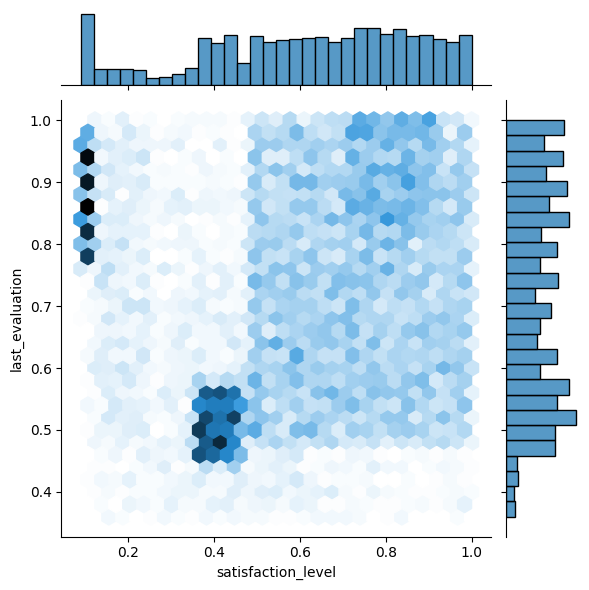

In [27]:
# The two features we'll use for training in this section
import seaborn as sns 
import matplotlib.pyplot as plt
sns.jointplot(x='satisfaction_level', y='last_evaluation',
              data=df, kind='hex')
plt.savefig('../graphs/analytics-Jplot.png',
            bbox_inches='tight', dpi=300)

In [28]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

The plot shows two overlaid 2D density distributions:
 + Red: Density of employees who stayed (left=0) across last evaluation scores and monthly hours.
 + Blue: Density of employees who left (left=1) across the same variables.
 + The thresh=0.05 ensures that only significant density regions are filled, making it easier to see where most employees fall rather than faint outliers.
# interpretation:
 + Are employees who left (blue) clustered at different evaluation scores/hours than those who stayed (red)?
 + Do high hours with low evaluations correlate with leaving?
Are there distinct patterns in the density shapes?

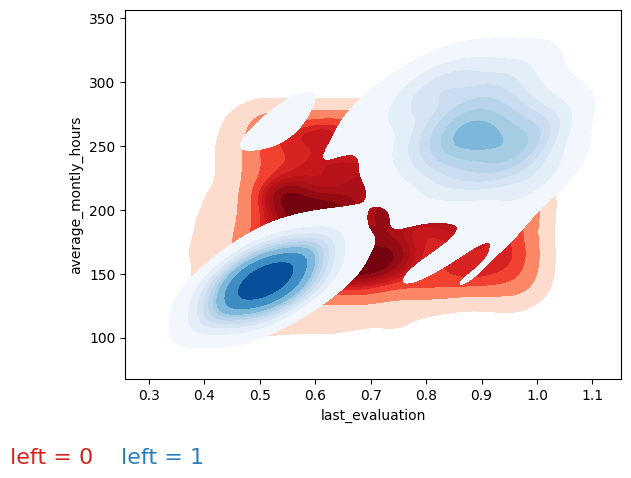

In [29]:
fig, ax = plt.subplots()
# plot_args = dict(fill=True)  
plot_args = dict(fill=True, thresh=0.05) 

for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(x=df.loc[df.left==i, 'last_evaluation'],
                y=df.loc[df.left==i, 'average_montly_hours'],
                cmap=c, **plot_args)

ax.text(0.05, 1.05, 'left = 0', size=16, color=sns.color_palette('Reds')[-2])
ax.text(0.25, 1.05, 'left = 1', size=16, color=sns.color_palette('Blues')[-2])
plt.savefig('../graphs/analytics-segmented.png',bbox_inches='tight', dpi=300)

### Interpretation for HR Analytics:
+ Low Evaluation, Moderate Hours (Blue, ~0.4-0.6 evaluation, 150-200 hours): Employees with lower performance evaluations and moderate workloads are more likely to leave. This could indicate dissatisfaction with performance feedback, lack of growth opportunities, or insufficient recognition.
+ High Evaluation, High Hours (Blue, ~0.8-1.0 evaluation, 250-300 hours): High-performing employees working long hours are also leaving, possibly due to burnout, overwork, or lack of work-life balance.
+ Moderate to High Evaluation, Moderate Hours (Red, ~0.6-1.0 evaluation, 150-250 hours): Employees who stayed tend to have better evaluations and moderate hours, suggesting these conditions are associated with retention.

In [30]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [31]:
df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
6857,0.49,0.64,3,142.0,4.0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,True,False


In [32]:
features = ['satisfaction_level', 'last_evaluation']
df[features]

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [33]:
from sklearn.model_selection import train_test_split
X= df[['satisfaction_level', 'last_evaluation']] 
y= df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y,   test_size=0.3)

In [34]:
type(X_train)

pandas.core.frame.DataFrame

In [35]:
X_train.shape, X_test.shape

((10499, 2), (4500, 2))

In [36]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [37]:
# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [38]:
#classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 77.5%


In [39]:
# Accuracy by class?

from sklearn.metrics import confusion_matrix

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


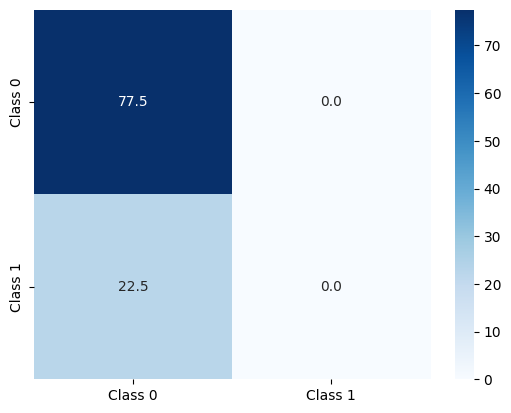

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
cm= confusion_matrix(y_test, y_pred)
_= sns.heatmap(cm / cm.sum() * 100, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# sns.heatmap(cm_percent = cm / cm.sum() * 100, 
#             annot=True, fmt='.1f', cmap='Blues', 
#             xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

In [41]:
! pip install mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [42]:
! pip list | grep mlxtend  

mlxtend                   0.23.4


In [43]:
type(X)

pandas.core.frame.DataFrame

<Axes: >

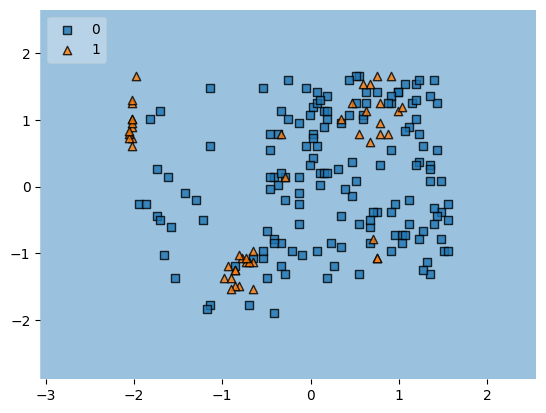

In [44]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]

# pca = PCA(n_components=2)
# X_2d = pca.fit_transform(X)
plot_decision_regions(X, y.to_numpy().flatten() , clf=svm, legend=2)


In [45]:
# Train a kernel SVM

svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, random_state=1)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y.to_numpy().flatten(), clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 90.4%


predictions     
                   0    1
actual 0        3372  116
       1         318  694


percent accuracy score per class:
left = 0 : 96.67%
left = 1 : 68.58%



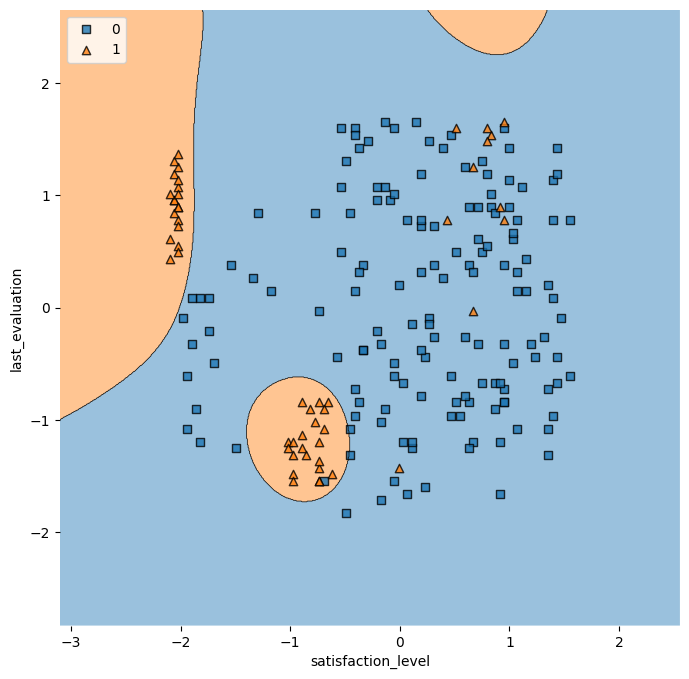

In [47]:
check_model_fit(svm, X_test_std, y_test)
plt.savefig('../graphs/analytics-svm.png',
            bbox_inches='tight', dpi=300)

In [48]:
# Load the K-Nearest Neighbors class

from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

total accuracy = 91.6%


predictions     
                   0    1
actual 0        3287  201
       1         176  836


percent accuracy score per class:
left = 0 : 94.24%
left = 1 : 82.61%



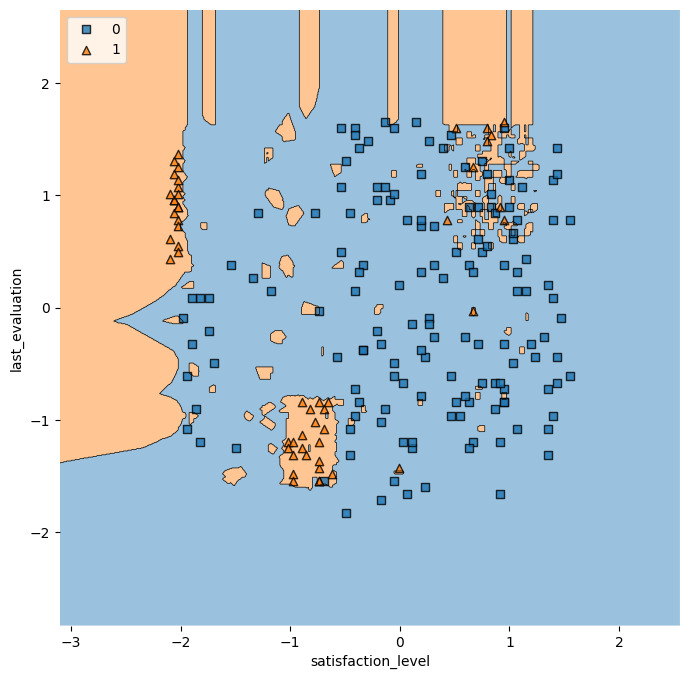

In [49]:
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.savefig('../graphs/analytics-knn-overfit.png',
            bbox_inches='tight', dpi=300)

total accuracy = 91.8%


predictions     
                   0    1
actual 0        3351  137
       1         232  780


percent accuracy score per class:
left = 0 : 96.07%
left = 1 : 77.08%



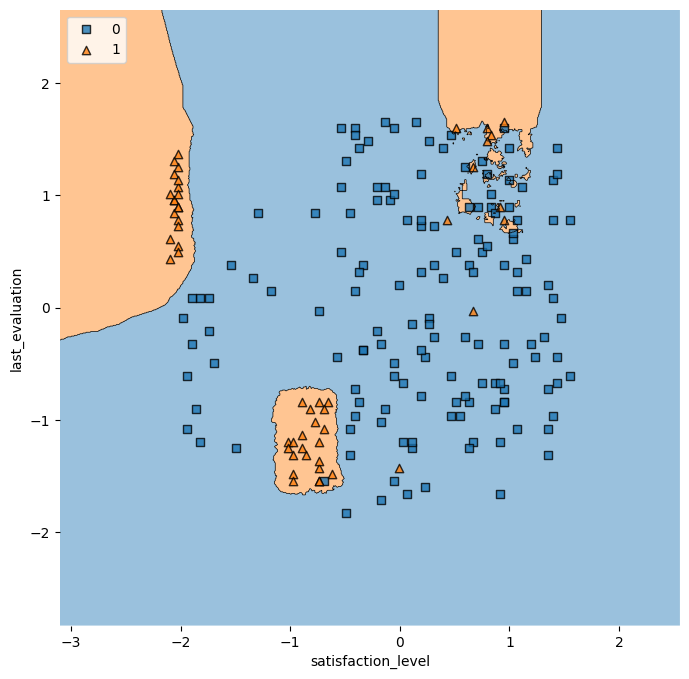

In [50]:
# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.savefig('../graphs/lhr-analytics-knn.png',
            bbox_inches='tight', dpi=300)

In [51]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [59]:
type(X_test)

pandas.core.frame.DataFrame

In [52]:
# Train a Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_depth=5,
                                random_state=1)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)
plt.xlim(-0.1, 1.2)
plt.ylim(0.2, 1.2)
plt.savefig('../graphs/hr-analytics-forest.png',
            bbox_inches='tight', dpi=300)

total accuracy = 92.9%


predictions     
                   0    1
actual 0        3447   41
       1         279  733


percent accuracy score per class:
left = 0 : 98.82%
left = 1 : 72.43%



ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

<Figure size 800x800 with 0 Axes>

In [2]:
import pandas as pd 
df = pd.read_csv('../data/hr_data_processed.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262.000000,6.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272.000000,4.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223.000000,5.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,160.163535,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [4]:
X = df[['satisfaction_level', 'last_evaluation']].values
y = df.left.values

In [6]:
type(y)

numpy.ndarray

In [8]:
# Instantiate the model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [10]:
# Stratified k-fold cross validation

from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(1)
scores = cross_val_score(
            estimator=clf,
            X=X,
            y=y,
            cv=10)

print(f'accuracy = {scores.mean():.3f} +/- {scores.std():.3f}')

accuracy = 0.923 +/- 0.005


In [12]:
# Custom function for class accuracies

from sklearn.model_selection import StratifiedKFold

def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv).split(X, y)

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X[train], y[train])

        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)
        class_acc = cmat.diagonal()/cmat.sum(axis=1)
        class_accuracy.append(class_acc)
        print('fold: {:d} accuracy: {:s}'.format(k+1, str(class_acc)))
        
    return np.array(class_accuracy)

In [14]:
# Stratified k-fold cross validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
np.random.seed(1)
scores = cross_val_class_score(clf, X, y)

print(f'accuracy = {scores.mean(axis=0)} +/- {scores.std(axis=0)}')

fold: 1 accuracy: [0.99124343 0.75139665]
fold: 2 accuracy: [0.98950131 0.67787115]
fold: 3 accuracy: [0.98950131 0.70868347]
fold: 4 accuracy: [0.98600175 0.70308123]
fold: 5 accuracy: [0.98512686 0.71708683]
fold: 6 accuracy: [0.9816273  0.75910364]
fold: 7 accuracy: [0.98862642 0.69747899]
fold: 8 accuracy: [0.9816273  0.72268908]
fold: 9 accuracy: [0.9903762  0.72829132]
fold: 10 accuracy: [0.98861646 0.70588235]
accuracy = [0.98722483 0.71715647] +/- [0.00330013 0.02326823]
